# Primera entrega de CoderHouse

## Presentacion de Power Point

> https://github.com/Havilongo/Proyecto-CoderHouse/blob/main/Presentacion.pdf

## Data Scraping 

> https://github.com/Havilongo/Proyecto-CoderHouse/blob/main/Scrape_data.ipynb

## Data Cleaning
 > https://github.com/Havilongo/Proyecto-CoderHouse/blob/main/Data_cleaning.ipynb

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Subo los dataframe 

In [2]:
df_partidos = pd.read_csv('https://raw.githubusercontent.com/Havilongo/Proyecto-CoderHouse/main/copa_america_resultados_data_limpia.csv')

df_partidos

,EquipoLocal,EquipoVisitante,Año,GolesLocal,GolesVisitante,GolesTotales
0,Argentina,Venezuela,2022,3,0,3
1,Brasil,Serbia,2022,2,0,2
2,Brasil,Suiza,2022,1,0,1
3,Camerún,Brasil,2022,1,0,1
4,Brasil,Corea del Sur,2022,4,1,5
...,...,...,...,...,...,...
649,Argentina,Ecuador,2021,3,0,3
650,Brasil,Perú,2021,1,0,1
651,Argentina,Colombia,2021,1,1,2
652,Colombia,Perú,2021,3,2,5


# 1 Calcular la cantidad de goles de un equipo
> Para calcular la cantidad de goles que hace un equipo vamos a dividir el df en 2 partes, equipo local y visitante.
Despues en el caso de equipo local vamos a pensar a los goleslocal como goles marcados y goles visitantes como goles recibidos. Con el equipo visitante sera lo contrario. 


In [3]:
# Dividir el df en df_local y df_visitante
df_local = df_partidos[['EquipoLocal', 'GolesLocal','GolesVisitante']]
df_visitante = df_partidos[['EquipoVisitante', 'GolesLocal','GolesVisitante']]


In [4]:
# Renombrar Columnas
df_local = df_local.rename(columns={'EquipoLocal' : 'Equipo', 
                         'GolesLocal' : 'GolesMarcados',
                         'GolesVisitante' : 'GolesRecibidos'})

df_local.sort_values('Equipo')

,Equipo,GolesMarcados,GolesRecibidos
250,Albania,0,3
146,Alemania,2,0
133,Alemania,0,2
43,Arabia Saudita,1,2
161,Arabia Saudita,1,2
...,...,...,...
283,Venezuela,0,4
8,Venezuela,0,1
619,Venezuela,0,2
112,Venezuela,1,0


In [5]:
df_visitante = df_visitante.rename(columns={'EquipoVisitante' : 'Equipo', 
                         'GolesLocal' : 'GolesRecibidos',
                         'GolesVisitante' : 'GolesMarcados'})
df_visitante.sort_values('Equipo')

,Equipo,GolesRecibidos,GolesMarcados
180,Alemania,1,3
235,Alemania,2,2
106,Alemania,2,4
247,Andorra,1,0
27,Arabia Saudita,1,2
...,...,...,...
432,Venezuela,2,0
430,Venezuela,2,0
429,Venezuela,1,0
605,Venezuela,1,3


In [6]:
# Concatenar y agrupar y calcular la suma. Esa suma va a ser los goles convertidos y recibidos por cada equipo
df_goles = pd.concat([df_local,df_visitante], ignore_index= True).groupby(['Equipo']).sum()
df_goles.index

Index(['Albania', 'Alemania', 'Andorra', 'Arabia Saudita', 'ArabiaSaudita',
       'Argelia', 'Argentina', 'Australia', 'Bolívia', 'Brasil', 'Cabo Verde',
       'Camerún', 'Canadá', 'Catar', 'Chile', 'Colombia', 'Corea del Sur',
       'CoreadelSur', 'Costa Rica', 'Costa de Marfil', 'Croacia', 'Cuba',
       'Curacao', 'Dominica', 'Ecuador', 'El Salvador', 'ElSalvador',
       'Emiratos Árabes Unidos', 'Eslovaquia', 'Eslovenia', 'España',
       'Estados Unidos', 'Estonia', 'Francia', 'Gales', 'Ghana', 'Grenada',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Haití', 'Honduras',
       'Indonesia', 'Inglaterra', 'Irak', 'Irán', 'Islandia', 'Italia',
       'Jamaica', 'Japón', 'Jordania', 'Malta', 'Marruecos', 'Martinique',
       'Montserrat', 'México', 'Nicaragua', 'Nigeria', 'Nueva Zelanda', 'Omán',
       'Panamá', 'Paraguay', 'Países Bajos', 'Perú', 'Polonia', 'Portugal',
       'República Dominicana', 'Rumania', 'Senegal', 'Serbia', 'Siria',
       'St. Kitts and Nevis', 'Suiz

In [7]:
# Concatenar y agrupar y calcular la media. Esa media va a ser la cantidad de goles esperado por partido
df_goles_media = pd.concat([df_local,df_visitante], ignore_index= True).groupby('Equipo').mean()
df_goles_media

,GolesMarcados,GolesRecibidos
Equipo,,
Albania,0.000000,3.000000
Alemania,2.200000,1.400000
Andorra,0.000000,1.000000
Arabia Saudita,0.875000,1.500000
ArabiaSaudita,0.000000,1.000000
...,...,...
Trinidad y Tobago,0.444444,2.222222
Túnez,1.500000,2.500000
Uruguay,1.457447,0.893617


### Filtro ambos por los equipos que estan en la copa

In [8]:
# Me quedo con los equipos presentes en la copa
equipos_copa = [
    'Perú', 'Chile', 'Canadá', 'Argentina',
    'México', 'Ecuador', 'Jamaica', 'Venezuela', 
    'Colombia', 'Paraguay', 'Costa Rica','Brasil', 
    'Estados Unidos' ,'Uruguay','Bolívia', 'Panamá'
]



In [9]:
# Filtro solo los equipos de la copa america 2024
df_goles2 = df_goles[df_goles.index.isin(equipos_copa)]
df_goles2

,GolesMarcados,GolesRecibidos
Equipo,,
Argentina,203,75
Bolívia,60,124
Brasil,217,81
Canadá,8,10
Chile,121,112
Colombia,133,84
Costa Rica,55,70
Ecuador,85,109
Estados Unidos,68,59


## Grafico Univariado

In [10]:
# Elegimos una paleta que de un contrate
palette = sns.color_palette("Set1", len(df_goles2))

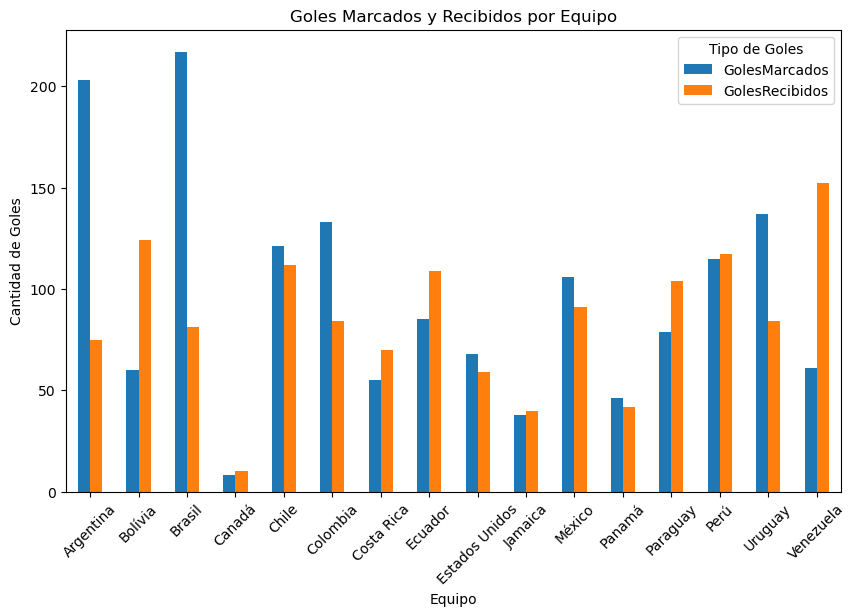

In [11]:
# Crear un gráfico de barras
df_goles2.plot(kind='bar', figsize=(10, 6))
plt.title('Goles Marcados y Recibidos por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Goles')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Goles')
plt.show()

### Grafico Bivariado

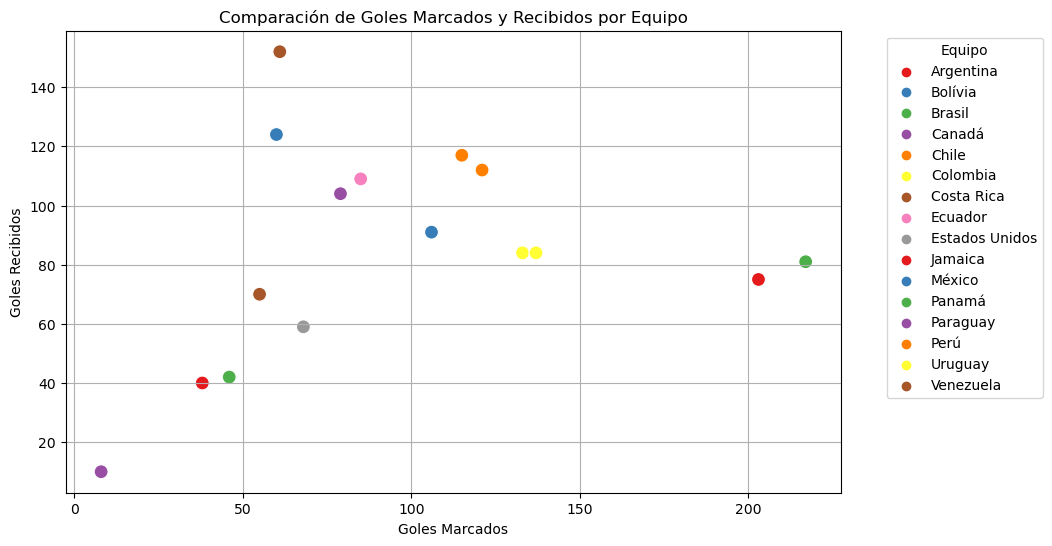

In [12]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_goles2, x='GolesMarcados', y='GolesRecibidos', hue='Equipo', s=100, palette=palette)

# Añadir títulos y etiquetas
plt.title('Comparación de Goles Marcados y Recibidos por Equipo')
plt.xlabel('Goles Marcados')
plt.ylabel('Goles Recibidos')


plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

> La Cantidad de Goles recibidos y convertidos nos permite diferenciar a los equipos, puede ser variables a utilizar para realizar la prediccion

### Ahora realizo lo mismo pero con los promedios, para no estar tan sesgado por el numero de partidos que pude conseguir

In [13]:
# Filtro solo los equipos de la copa america 2024
df_media = df_goles_media[df_goles_media.index.isin(equipos_copa)]
df_media

,GolesMarcados,GolesRecibidos
Equipo,,
Argentina,2.071429,0.765306
Bolívia,0.845070,1.746479
Brasil,2.106796,0.786408
Canadá,1.142857,1.428571
Chile,1.315217,1.217391
Colombia,1.343434,0.848485
Costa Rica,1.375000,1.750000
Ecuador,1.103896,1.415584
Estados Unidos,1.478261,1.282609


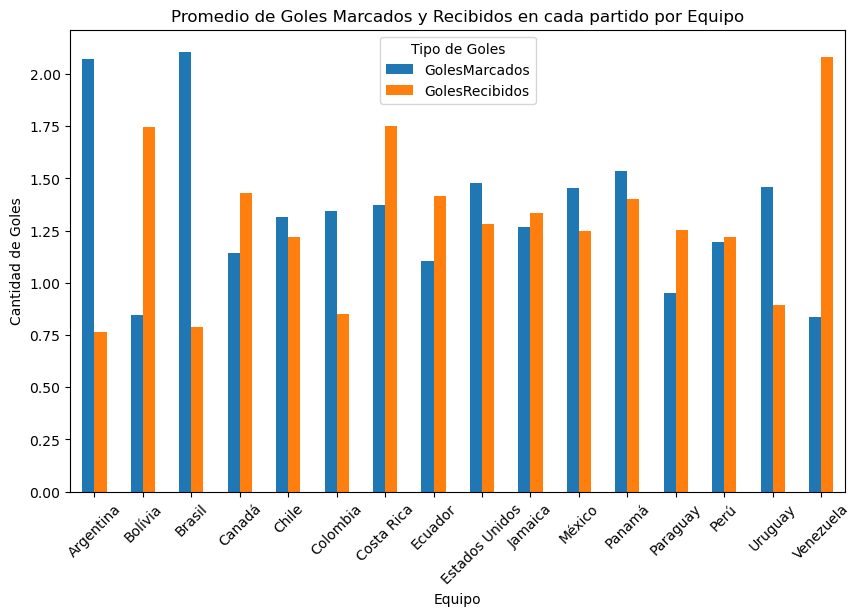

In [14]:
# Crear un gráfico de barras
df_media.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de Goles Marcados y Recibidos en cada partido por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Goles')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Goles')
plt.show()

Argentina y Brasil marcan por lo menos 2 goles por partido y tienen probabilidad de recibir menos de uno.
Bolivia, Costa Rica y Venezuela son los equipos mas propensos a recibir goles en contra

### Grafico Bivariado

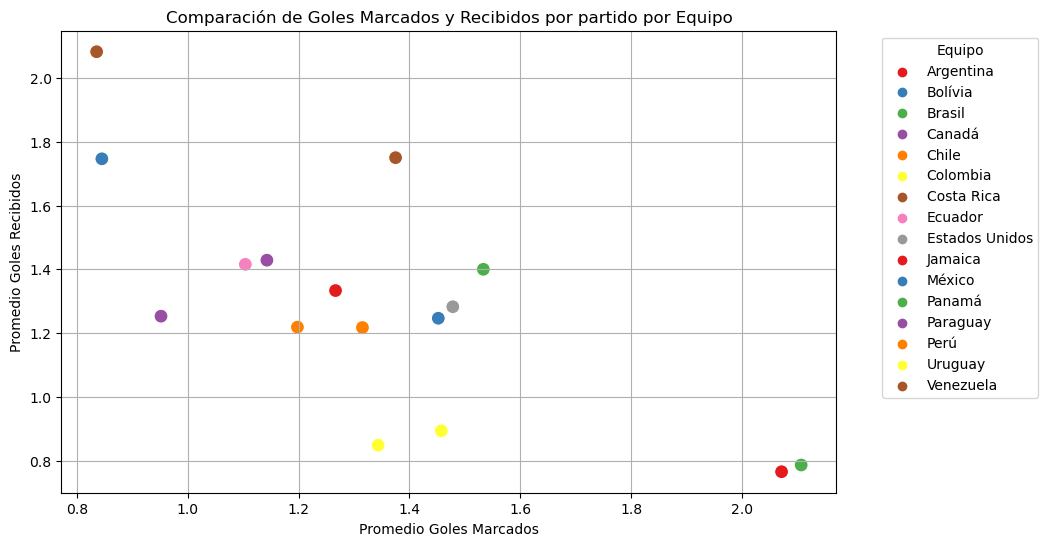

In [15]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_media, x='GolesMarcados', y='GolesRecibidos', hue='Equipo', s=100, palette=palette)

# Añadir títulos y etiquetas
plt.title('Comparación de Goles Marcados y Recibidos por partido por Equipo')
plt.xlabel('Promedio Goles Marcados')
plt.ylabel('Promedio Goles Recibidos')


plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Analisis de Jugadores que juegan la Copa america

> https://github.com/Havilongo/Proyecto-CoderHouse/blob/main/data_Jugadores.ipynb